In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
df_red = pd.read_csv('../Data/Raw/wine/winequality-red.csv', sep=';')
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [29]:
df_white = pd.read_csv('../Data/Raw/wine/winequality-white.csv', sep=';')
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [30]:
df_red['red'] = 1
df_white['red'] = 0

In [31]:
df_total = pd.concat([df_white,df_red])
df_total = df_total.reset_index()
df_total = df_total.drop(columns = 'index')


Normalizing Data

In [32]:
df_total.describe()['fixed acidity']['min']

3.8

In [33]:
df_total.describe()['fixed acidity']['max']

15.9

In [34]:
df_norm = df_total

In [35]:
norm_col = df_total.columns[:len(df_total.columns)-2]
df_norm = df_total
norm_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [36]:
for cname in norm_col:
    df_norm[cname] = df_norm[cname]-df_norm.describe()[cname]['min'] / df_norm.describe()[cname]['max'] - df_norm[cname]

In [37]:
#for cname in df_norm.columns[:len(df_norm.columns)-2]:    
    #for i in range(df_total[cname].count()):
        #df_norm[cname][i] = math.log(df_norm[cname][i])

In [38]:
df_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
1,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
2,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
3,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
4,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,5,1
6493,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,1
6494,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,1
6495,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,5,1


PLOTTING

In [39]:
faixa_dinamica = pd.concat([df_norm.min(),df_norm.max()],axis =1)
faixa_dinamica.columns = ['Min','Max']
faixa_dinamica['Range'] =faixa_dinamica['Max'] - faixa_dinamica['Min']
faixa_dinamica

,Min,Max,Range
fixed acidity,-0.238994,-0.238994,4.440892e-16
volatile acidity,-0.050633,-0.050633,5.551115e-17
citric acid,0.000000,0.000000,0.000000e+00
residual sugar,-0.009119,-0.009119,4.440892e-15
chlorides,-0.014730,-0.014730,5.551115e-17
free sulfur dioxide,-0.003460,-0.003460,2.842171e-14
total sulfur dioxide,-0.013636,-0.013636,1.421085e-14
density,-0.950076,-0.950076,0.000000e+00
pH,-0.678304,-0.678304,0.000000e+00
sulphates,-0.110000,-0.110000,1.110223e-16


In [40]:
df_norm[(df_norm['citric acid']==0)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
1,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
2,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
3,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
4,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,5,1
6493,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,1
6494,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,6,1
6495,-0.238994,-0.050633,0.0,-0.009119,-0.01473,-0.00346,-0.013636,-0.950076,-0.678304,-0.11,-0.536913,5,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE43B6D048>,
      dtype=object)

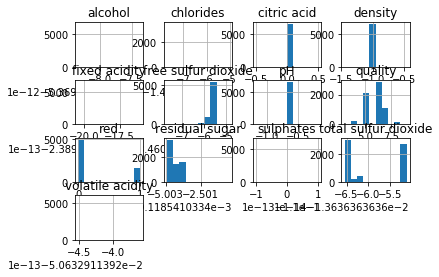

In [41]:
df_norm.hist()

LinAlgError: singular matrix

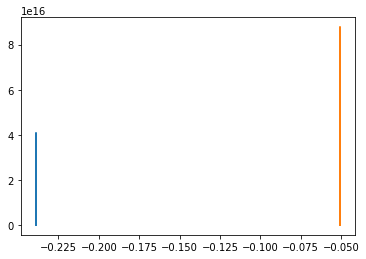

In [42]:
df_norm.plot.kde()

LinAlgError: singular matrix

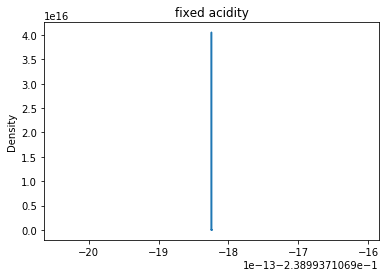

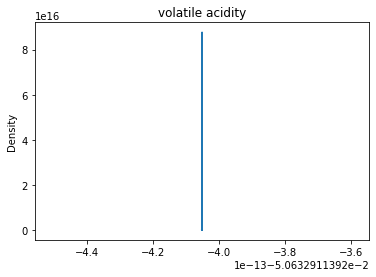

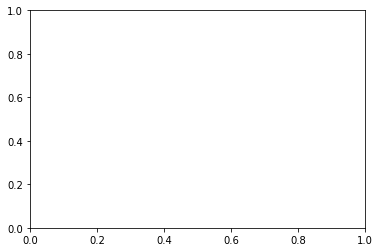

In [43]:
for cname in df_norm.columns:
    plt.figure()
    df_norm[cname].plot.kde()
    plt.title(cname)

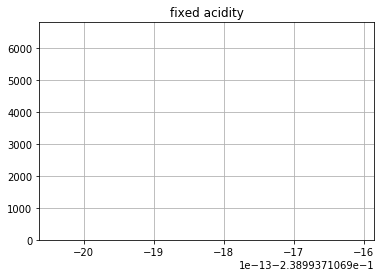

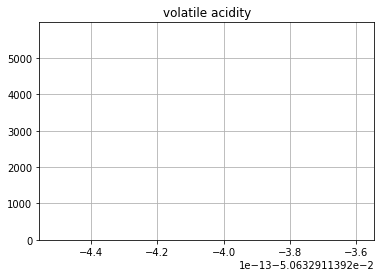

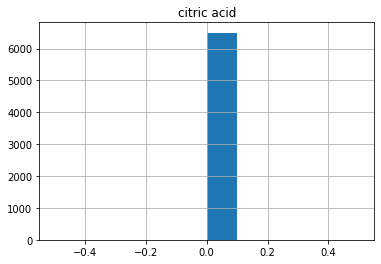

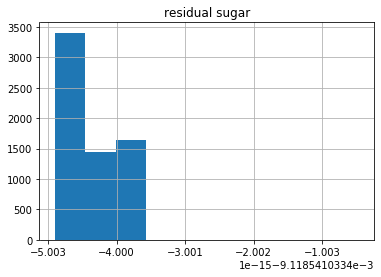

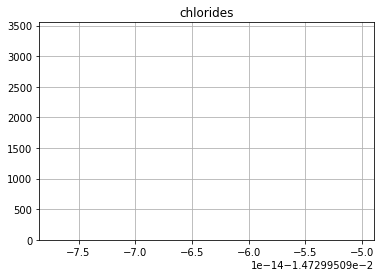

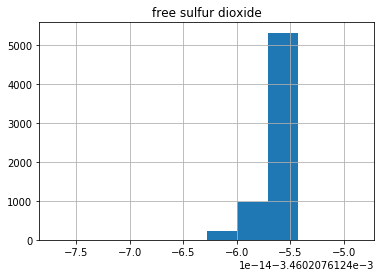

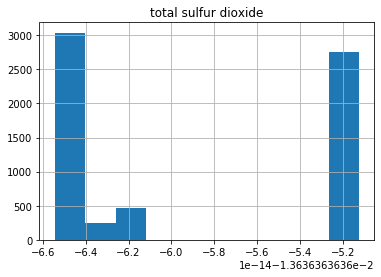

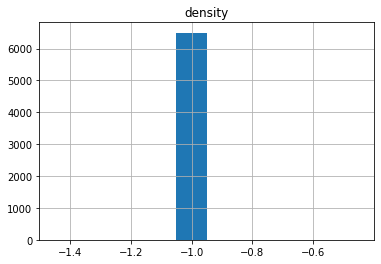

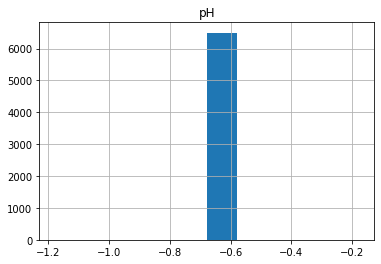

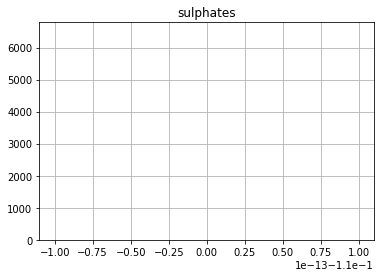

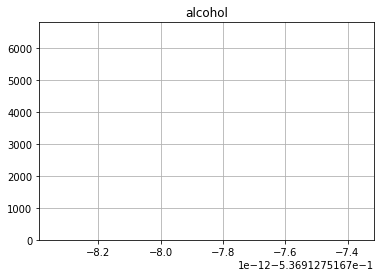

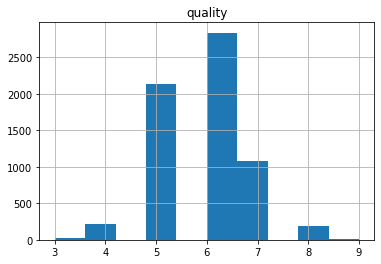

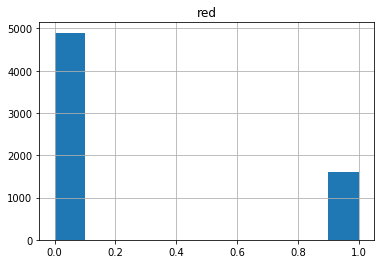

In [44]:
for cname in df_norm.columns:
    plt.figure()
    df_norm[cname].hist()
    plt.title(cname)

LinAlgError: singular matrix

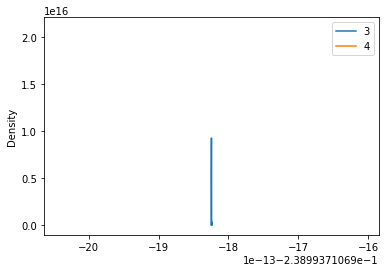

In [45]:
for cname in df_norm.columns[:len(df_norm.columns)-2]:
    plt.figure()
    df_norm.groupby('quality')[cname].plot.kde(legend = True)
    plt.title(cname)
    

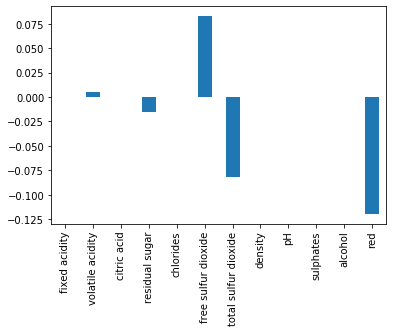

In [46]:
df_norm.corr()['quality'].drop('quality').plot.bar()

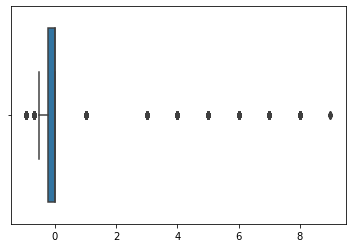

In [47]:
sns.boxplot(df_norm)

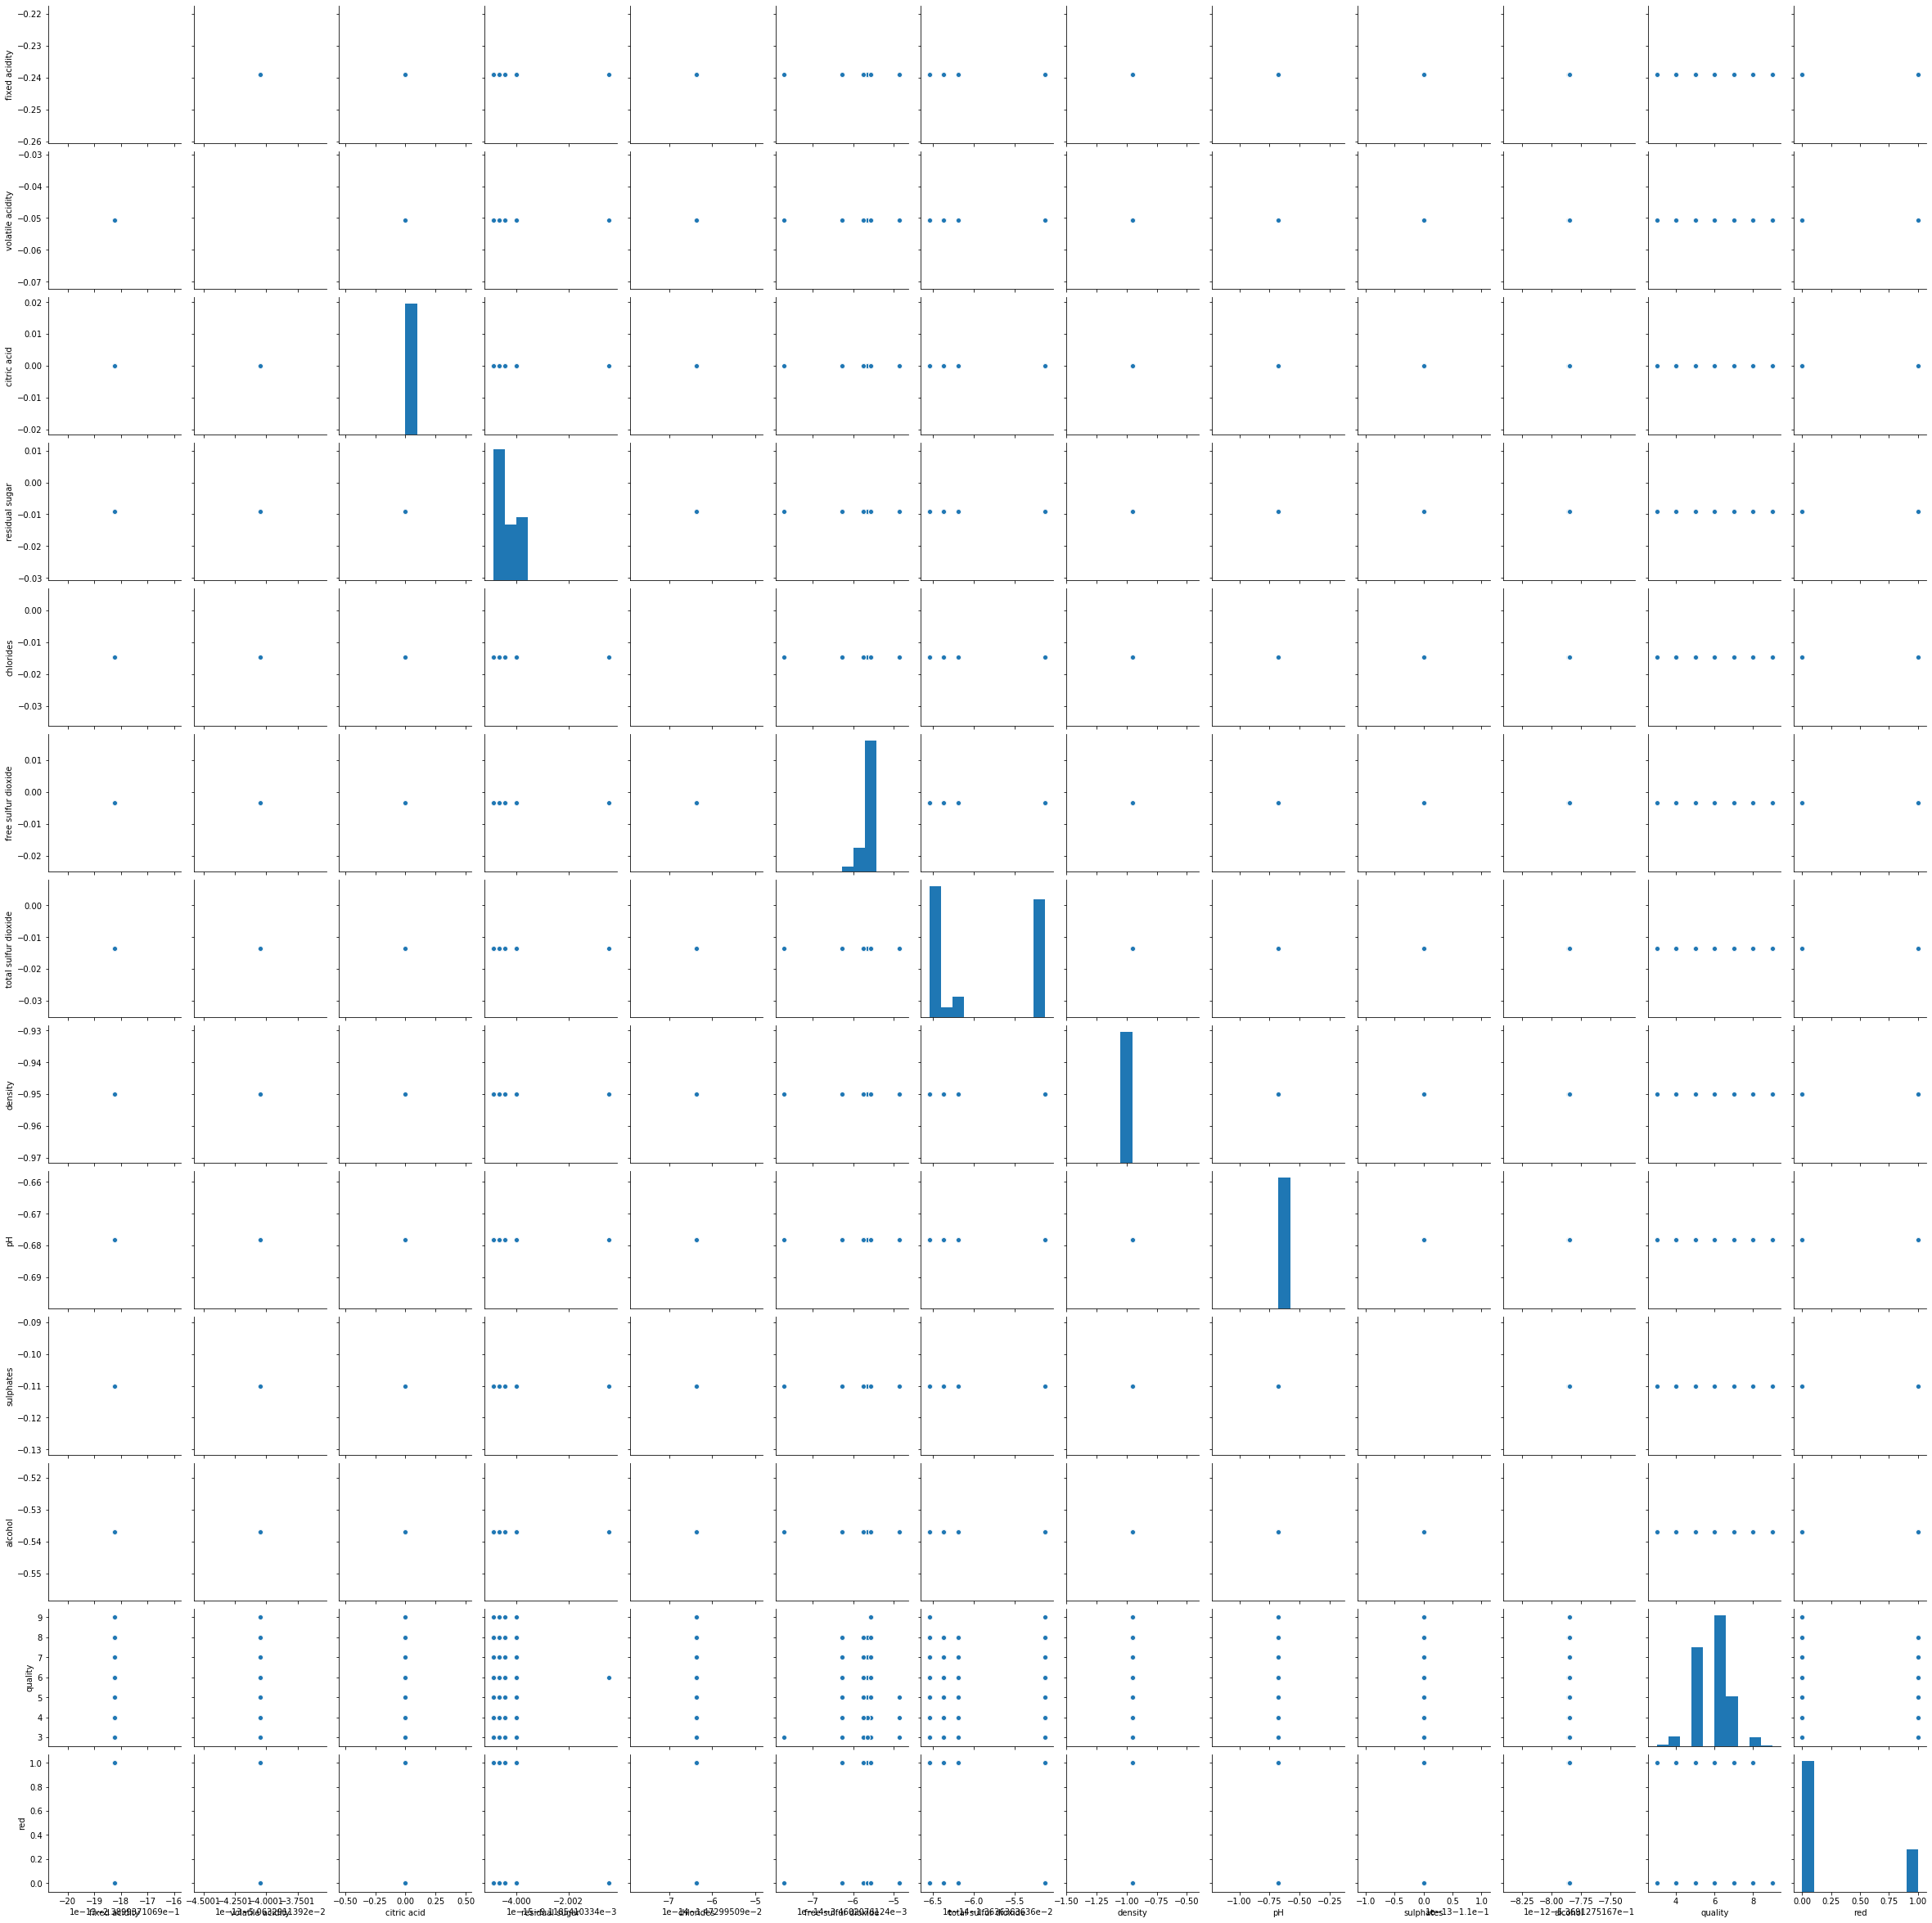

In [48]:
sns.pairplot(df_norm)